<a href="https://colab.research.google.com/github/Jin4041/Back_Learning/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import boston_housing

(train_data,train_targets),(test_data,test_targets)=(boston_housing.load_data())

57026/57026 [==============================] - 0s 0us/step


In [ ]:
mean=train_data.mean(axis=0)
train_data-=mean
std=train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
def build_model():
  model=keras.Sequential([
      layers.Dense(64,activation="relu"),
      layers.Dense(64,activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse",metrics=["mae"])
  return model

In [ ]:
import numpy as np
k=3
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]

for i in range(k):
  print('processing fold #',i)
  val_data=train_data[i*num_val_samples: (i+1)*num_val_samples]
  val_targets=train_targets[i*num_val_samples: (i+1)*num_val_samples]
  partial_train_data=np.concatenate([train_data[:i*num_val_samples],
                                   train_data[(i+1)*num_val_samples:]],
                                  axis=0)
  partial_train_targets=np.concatenate([train_targets[:i*num_val_samples],
                                   train_targets[(i+1)*num_val_samples:]],
                                  axis=0)
model=build_model()
model.fit(partial_train_data, partial_train_targets,
          epochs=num_epochs, batch_size=1,verbose=0)
val_mse,val_mae=model.evaluate(val_data,val_targets,verbose=0)
all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2


In [ ]:
num_epochs=500
all_mae_histories=[]
for i in range(k):
  print(f"#{i}번째 폴드 처리중")
  val_data=train_data[i*num_val_samples: (i+1*num_val_samples)]
  val_targets=train_targets[i*num_val_samples: (i+1)*num_val_samples]
  partial_train_data=np.concatenate([
      train_data[:i*num_val_samples],
      train_data[(i+1)*num_val_samples:]],
      axis=0)
  partial_train_targets=np.concatenate(
      [train_targets[:i*num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
      axis=0)
model=build_model()
history=model.fit(partial_train_data, partial_train_targets,
          epochs=num_epochs, batch_size=16,verbose=0)
mae_history=history.history['val_mae']
all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중


KeyError: 'val_mae'

In [ ]:
average_mae_history=[
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


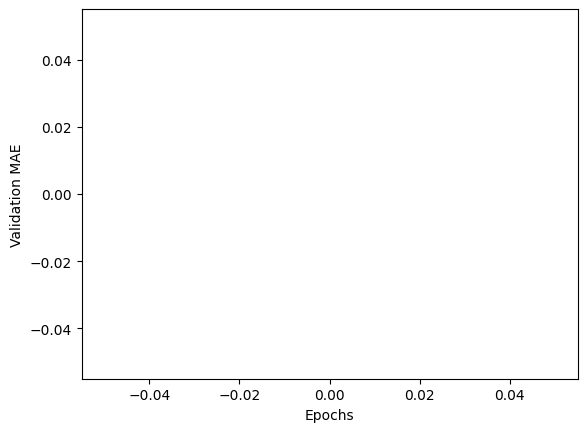

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

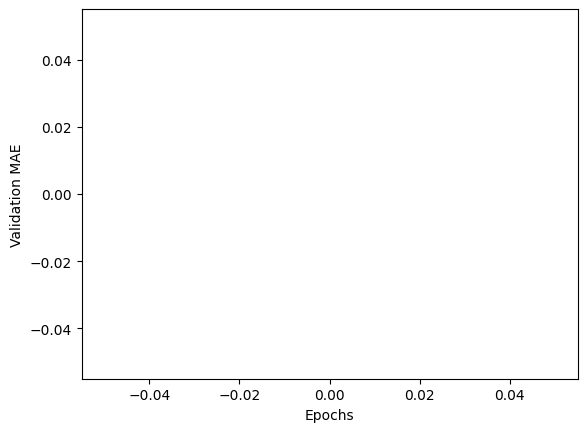

In [ ]:
truncated_mae_history=average_mae_history[10:]
plt.plot(range(1,len(truncated_mae_history)+1),truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [ ]:
model=build_model()
model.fit(train_data,train_targets,
          epochs=130,batch_size=16,verbose=0)
test_mse_score,test_mae_score=model.evaluate(test_data,test_targets)
test_mae_score

4/4 [==============================] - 0s 4ms/step - loss: 15.2592 - mae: 2.5621


2.562105655670166